## Random Forest

In dit notebook wordt een Random Forest model gefit op de metadata zonder tekst. In het script cleanup.ipynb zijn verschillende csv bestanden gemaakt die verschillende groepen metadata bevatten. In dit script worden deze afzonderlijke csv's gebruikt om te kijken hoe de prestaties onderling verschillen. 

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, make_scorer, precision_score, recall_score, classification_report

from sklearn.inspection import permutation_importance


In [2]:
def RandomSearchRF(data):
    """Splits the data into x_train, x_test, y_train, y_test, performs a randomsearch on Random Forest Classifier and calculates the accuracy score using
       the best parameters."""
       
    # select x and y from data
    y = data.pop('real_fake_grade')
    x = data
    x = StandardScaler().fit_transform(x)

    # split into train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

    # perform Random Search with 7-fold CV and scoring on accuracy
    rf_rs = RandomizedSearchCV(RandomForestClassifier(), 
                          param_distributions = {'criterion': ['gini', 'entropy'], 
                                                'min_samples_split': [10,15,20]},
                          cv = 7,
                          scoring = make_scorer(accuracy_score)) 

    # fit the model
    rf_rs.fit(x_train, y_train)
    print('Best parameters:\n', rf_rs.best_params_)
    print()

    # make prediction with best parameters
    y_pred = rf_rs.best_estimator_.predict(x_test)

    # calculate accuracy score, precision and recall
    print('Accuracy score:', accuracy_score(y_test, y_pred))
    print('precision score:', precision_score(y_test, y_pred, average = 'macro')) # unweighted mean of all classes
    print('recall score:', recall_score(y_test, y_pred, average = 'macro')) # unweighted mean of all classes

    # classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    print(report_df)


## Alle metadata

In [3]:

all_data = pd.read_csv('../../data/cleaned_data/all_columns.csv')

In [4]:
# should only contain metadata columns, texts are not part of them
all_data = all_data.drop(['Unnamed: 0', 'full_text', 'user_description', 'username'], axis = 1)

In [5]:
RandomSearchRF(all_data)

Best parameters:
 {'min_samples_split': 10, 'criterion': 'gini'}

Accuracy score: 0.7387729285262492
precision score: 0.6733142773380241
recall score: 0.5460239672778109
              precision    recall  f1-score      support
-1.0           0.733333  0.653928  0.691358   471.000000
0.0            0.541667  0.071429  0.126214   182.000000
1.0            0.744943  0.912716  0.820339   928.000000
accuracy       0.738773  0.738773  0.738773     0.738773
macro avg      0.673314  0.546024  0.545970  1581.000000
weighted avg   0.718084  0.738773  0.702008  1581.000000


#### Tweet data

In [6]:
tweet_data = pd.read_csv('../../data/cleaned_data/tweet_data_columns.csv')

In [7]:
tweet_data = tweet_data.drop('Unnamed: 0', axis = 1)

In [8]:
RandomSearchRF(tweet_data)

Best parameters:
 {'min_samples_split': 15, 'criterion': 'entropy'}

Accuracy score: 0.6774193548387096
precision score: 0.5345963044898029
recall score: 0.47702013451931097
              precision    recall  f1-score      support
-1.0           0.613861  0.526539  0.566857   471.000000
0.0            0.285714  0.021978  0.040816   182.000000
1.0            0.704213  0.882543  0.783357   928.000000
accuracy       0.677419  0.677419  0.677419     0.677419
macro avg      0.534596  0.477020  0.463677  1581.000000
weighted avg   0.629120  0.677419  0.633380  1581.000000


### User Data

In [9]:
user_data = pd.read_csv('../../data/cleaned_data/user_data_columns.csv')
user_data = user_data.drop('Unnamed: 0', axis = 1)

In [10]:
RandomSearchRF(user_data)

Best parameters:
 {'min_samples_split': 10, 'criterion': 'entropy'}

Accuracy score: 0.7273877292852625
precision score: 0.6688906584842168
recall score: 0.5346435966356897
              precision    recall  f1-score      support
-1.0           0.771588  0.588110  0.667470   471.000000
0.0            0.515152  0.093407  0.158140   182.000000
1.0            0.719933  0.922414  0.808692   928.000000
accuracy       0.727388  0.727388  0.727388     0.727388
macro avg      0.668891  0.534644  0.544767  1581.000000
weighted avg   0.711748  0.727388  0.691730  1581.000000


## Feature importances van subsets zonder feature selection

Paramaters hetzelfde gekozen als de best parameters van de randomsearch. 

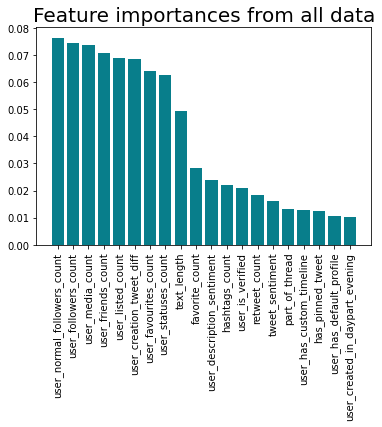

In [11]:
all_data = pd.read_csv('../../data/cleaned_data/all_columns.csv')

# should only contain metadata columns, texts are not part of them
all_data = all_data.drop(['Unnamed: 0', 'full_text', 'user_description', 'username'], axis = 1)

# select x and y from data
y = all_data.pop('real_fake_grade')
x = all_data
x = StandardScaler().fit_transform(x)

# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

model = RandomForestClassifier(min_samples_split=2).fit(x_train, y_train)

importances = pd.DataFrame(data={
    'Attribute': all_data.columns,
    'Importance': model.feature_importances_

})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances[0:20] # select first 20, all columns is too much

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances from all data', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Tweet data


In [12]:
tweet_data = pd.read_csv('../../data/cleaned_data/tweet_data_columns.csv')
tweet_data = tweet_data.drop('Unnamed: 0', axis = 1)

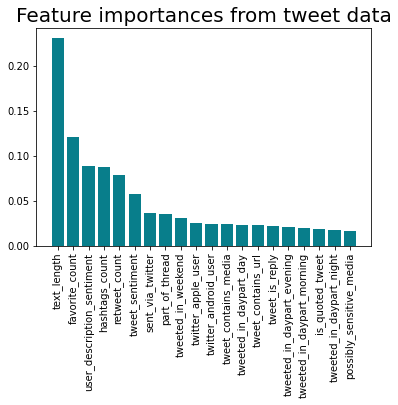

In [13]:
# select x and y from data
y = tweet_data.pop('real_fake_grade')
x = tweet_data
x = StandardScaler().fit_transform(x)

# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

model = RandomForestClassifier(min_samples_split=2).fit(x_train, y_train)

importances = pd.DataFrame(data={
    'Attribute': tweet_data.columns,
    'Importance': model.feature_importances_

})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances[0:20] # select first 20, all columns is too much

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances from tweet data', size=20)
plt.xticks(rotation='vertical')
plt.show()

### user data

In [17]:
user_data = pd.read_csv('../../data/cleaned_data/user_data_columns.csv')
user_data = user_data.drop('Unnamed: 0', axis = 1)

In [18]:
# select x and y from data
y = user_data.pop('real_fake_grade')
x = user_data
x = StandardScaler().fit_transform(x)

# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

In [19]:
model = RandomForestClassifier(min_samples_split=5).fit(x_train, y_train)

In [20]:
importances = pd.DataFrame(data={
    'Attribute': user_data.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

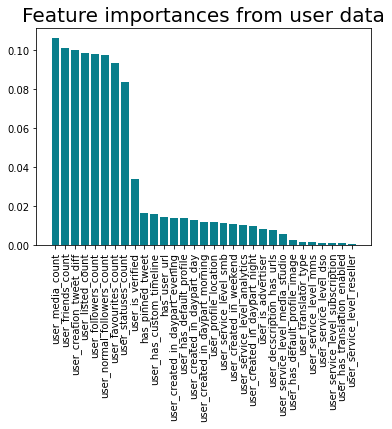

In [21]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances from user data', size=20)
plt.xticks(rotation='vertical')
plt.show()

## Resultaten op data met feature selection

De datasets die hieronder gebruikt worden zijn afkomstig van het script feature_selection.ipynb.

In [22]:
all_data_selected = pd.read_csv('../../data/selected_data/all_data_selected.csv')
all_data_selected = all_data_selected.drop([ 'Unnamed: 0', 'full_text', 'user_description', 'username'], axis = 1)

In [23]:

RandomSearchRF(all_data_selected)

Best parameters:
 {'min_samples_split': 10, 'criterion': 'entropy'}

Accuracy score: 0.7318153067678684
precision score: 0.6557849177148399
recall score: 0.5316528492799634
              precision    recall  f1-score      support
-1.0           0.732010  0.626327  0.675057   471.000000
0.0            0.500000  0.049451  0.090000   182.000000
1.0            0.735345  0.919181  0.817050   928.000000
accuracy       0.731815  0.731815  0.731815     0.731815
macro avg      0.655785  0.531653  0.527369  1581.000000
weighted avg   0.707259  0.731815  0.691053  1581.000000


In [24]:
tweet_data_selected = pd.read_csv('../../data/selected_data/tweet_data_selected.csv')
tweet_data_selected = tweet_data_selected.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

In [25]:
RandomSearchRF(tweet_data_selected)

Best parameters:
 {'min_samples_split': 20, 'criterion': 'entropy'}

Accuracy score: 0.6755218216318786
precision score: 0.6041047441303196
recall score: 0.4720306111147315
              precision    recall  f1-score      support
-1.0           0.616368  0.511677  0.559165   471.000000
0.0            0.500000  0.016484  0.031915   182.000000
1.0            0.695946  0.887931  0.780303   928.000000
accuracy       0.675522  0.675522  0.675522     0.675522
macro avg      0.604105  0.472031  0.457128  1581.000000
weighted avg   0.649682  0.675522  0.628271  1581.000000


In [26]:
user_data_selected = pd.read_csv('../../data/selected_data/user_data_selected.csv')
user_data_selected = user_data_selected.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

In [27]:
RandomSearchRF(user_data_selected)

Best parameters:
 {'min_samples_split': 10, 'criterion': 'entropy'}

Accuracy score: 0.7273877292852625
precision score: 0.6638872368264541
recall score: 0.529259353008804
              precision    recall  f1-score      support
-1.0           0.771429  0.573248  0.657734   471.000000
0.0            0.500000  0.082418  0.141509   182.000000
1.0            0.720233  0.932112  0.812588   928.000000
accuracy       0.727388  0.727388  0.727388     0.727388
macro avg      0.663887  0.529259  0.537277  1581.000000
weighted avg   0.710132  0.727388  0.689203  1581.000000


### Feature en Permutation Importance van subsets met feature selection

De parameters van de modellen zijn hetzelfde als uit de modellen van de random search.

#### All Data selected

In [28]:
all_data_selected = pd.read_csv('../../data/selected_data/all_data_selected.csv')
all_data_selected = all_data_selected.drop([ 'Unnamed: 0', 'full_text', 'user_description', 'username'], axis = 1)

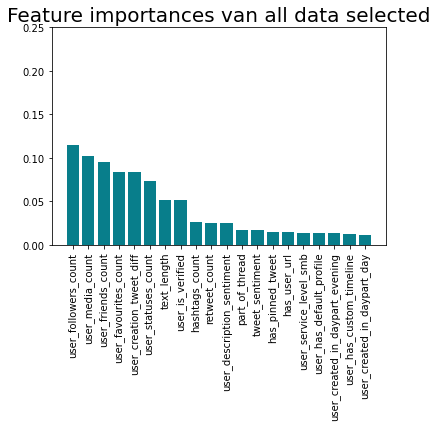

In [29]:
# select x and y from data
y = all_data_selected.pop('real_fake_grade')
x = all_data_selected
x = StandardScaler().fit_transform(x)

# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

model = RandomForestClassifier(min_samples_split=10).fit(x_train, y_train) # zelfde parameter waarden als uit _best_params_ van randomsearch

importances = pd.DataFrame(data={
    'Attribute': all_data_selected.columns,
    'Importance': model.feature_importances_

})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances[0:20] # select first 20, all columns is too much

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances van all data selected', size=20)
plt.xticks(rotation='vertical')
plt.ylim(0,0.25) # alle drie de figuren op dezelfde schaal
plt.show()

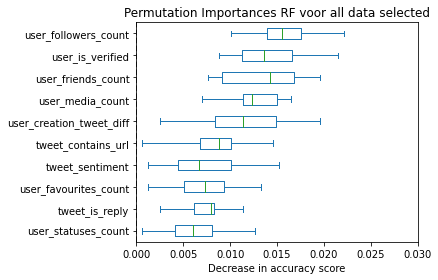

In [30]:
result = permutation_importance(
    model, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2,
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=all_data_selected.columns[sorted_importances_idx],
)


importances = importances.iloc[:,30:]

ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances RF voor all data selected")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()
plt.xlim(0,0.03)

plt.show()

In [31]:
tweet_data_selected = pd.read_csv('../../data/selected_data/tweet_data_selected.csv')
tweet_data_selected = tweet_data_selected.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

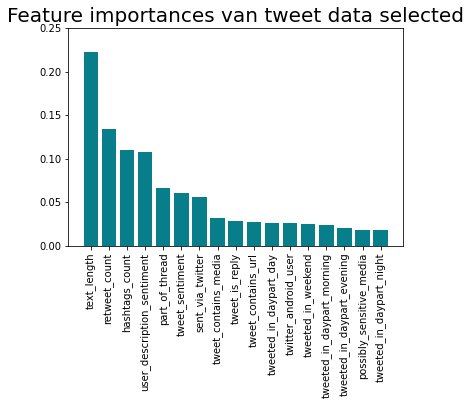

In [32]:
# select x and y from data
y = tweet_data_selected.pop('real_fake_grade')
x = tweet_data_selected
x = StandardScaler().fit_transform(x)

# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

model = RandomForestClassifier(min_samples_split=10).fit(x_train, y_train) # zelfde parameter waarden als uit _best_params_ van randomsearch

importances = pd.DataFrame(data={
    'Attribute': tweet_data_selected.columns,
    'Importance': model.feature_importances_

})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances[0:20] # select first 20, all columns is too much

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances van tweet data selected', size=20)
plt.xticks(rotation='vertical')
plt.ylim(0,0.25)
plt.show()

#### User data selected


In [33]:
user_data_selected = pd.read_csv('../../data/selected_data/user_data_selected.csv')
user_data_selected = user_data_selected.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

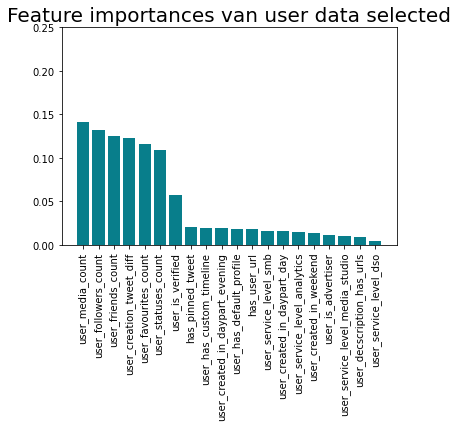

In [34]:
# select x and y from data
y = user_data_selected.pop('real_fake_grade')
x = user_data_selected
x = StandardScaler().fit_transform(x)

# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

model = RandomForestClassifier(min_samples_split=5).fit(x_train, y_train) # zelfde parameter waarden als uit _best_params_ van randomsearch

importances = pd.DataFrame(data={
    'Attribute': user_data_selected.columns,
    'Importance': model.feature_importances_

})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances[0:20] # select first 15, all columns is too much

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances van user data selected', size=20)
plt.xticks(rotation='vertical')
plt.ylim(0,0.25)
plt.show()